![Machine Learning for Scientists in a hurry](./fig/Title_ML.png)

<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 1. Introduction to Machine Learning</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco<br>Aldo Humberto Romero</h2>
  <br>
  <img src="fig/1-line logotype124-295.png" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="fig/SCPython.png" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

## Setup

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2023-10-22T11:22:11.822392-04:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.14.0

Compiler    : Clang 11.0.3 (clang-1103.0.32.62)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [3]:
import time
start = time.time()
chapter_number = 1
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import matplotlib as mpl
import sklearn

In [5]:
%watermark -iv

numpy     : 1.25.2
matplotlib: 3.8.0
sklearn   : 1.3.0



# What is Machine Learning

Machine Learning is a broad subject that intersects mathematics, statistics, computing, and the area of the target application, that being economics, biology, physics, and vision. 

One way of encapsulating the domain of Machine Learning is in the context of scientific research. One basic path of how humans started gaining understanding of nature was through observations and experimentation. What experiments and observations do is allow us to gather **data**. But **data** alone is not knowledge. Only through generalizations, raw data can be converted into Theories and those theories make predictions that could be corroborated or discredited with new **data**. In that sort of idea, what Machine Learning is about is producing those generalizations just from the **data**.

We can do science because nature offers **patterns**, mathematics is at its core all about **patterns** and the consequences of logical reasoning on them. Machine Learning also needs **patterns** without them any new data has nothing to do with previous ones. The only way of making predictions is under the assumption that the future resembles the past. 

In the past, we relied on mathematical models, that not only give us insight about nature but also equations that allow us to make predictions.  In most cases, clean equations are simply not possible and we have to use numerical approximations but we try to keep the understanding. Machine Learning is used in cases where mathematical models are known, numerical approximations are not feasible, and we
We are satisfied with the answers even if we lost the ability to understand why the parameters of Machine Learning models work the way they do.

In summary, we need 3 conditions for using Machine Learning on a problem:

 * Good **data**
 * The existence of **patterns** on the data
 * The lack of a good mathematical model to express the **patterns** present on the **data**

This workshop is meant to give a quick introduction to some of the techniques one can use to build algorithms for Machine Learning where those 3 conditions are met.
Specifically, we will discuss the following sub-fields within machine learning

 * **Classification** (for using labeled data to infer labels for unlabelled data)
 * **Anomaly Detection** (for finding outliers in a dataset)
 * **Dimensionality Reduction** (for analyzing and visualizing high-dimensional datasets)
 * **Clustering** (for grouping similar objects in a high dimensional space)

Our experience in solving a problem by using a computer always involves the idea that we have access to the data at the same time that you can define some specific rules that can be used to map
an answer. From a programming perspective, you need to create a series of rules that guarantee that given the input you get the correct output. In most cases, the input data is very diverse and the number of rules that needs to be applied to input sequences increases, making the programming scheme fail. A different approach is based on allowing the machine to learn, which means that experience will be used to make accurate predictions. This paradigm can be viewed as:

In [6]:
%%html
<img src="./fig/01.MachineLearningParadigm.jpeg" width="500" height="500">

In this new approach of solving problems in the computer, then our concern is to be able to create a model that will take the input and output and, by training a model, meaning allowing the computer to learn and extract the correlations between the provided data, we can find the model parameters that represent the rules and make a prediction (meaning that we can infer the rules in this learning process). 

The model parameters can be found by using past information, where the input and output is completely known. Here it is important to stress that the quality and size of the available data is the key to having a very good performance of the machine learning algorithm.

The goal or question that machine learning will try to address needs to be defined. Based on that question, data collection is the most complicated part of any machine learning. This could happen because the data is obtained from different formats, different sources, very old databases, etc. Before the data is used, it needs to be cleaned and formatted (this sounds like a trivial process but it is the most consuming part of the process). Even simple statistical correlations need to be performed across different data sources or constraint checks that guarantee that the data is uniform. Only good quality data would give the right value to the machine learning algorithm. After the data is pruned, the machine learning model needs to be selected. There is not a clear path on that and depends on experience, practice, and availability. In this tutorial, we will discuss a few algorithms, but the methods described here are incomplete and we encourage the attendee to go to the WEB or too technical books to search for more methods.



# Taxonomy of Machine Learning Algorithms

There are several ways of classifying the wide field of Machine Learning. Algorithms can be classified by the dimensionality of the input and output if they deal with discrete (categorical) input or output and the basic algorithm underlying the solution. However a classical classification is based on the existence or absents of known output in the problem proposed.

## Supervised,  Unsupervised and Reinforcement learning

The algorithms of machine learning are generally split into two basic categories: **Supervised**, **Unsupervised**, and reinforcement learning.

### Supervised Learning
**Supervised** learning concerns **labeled** data, and the construction of models that can be used to predict labels for new, unlabeled data. We have access to data that can be classified and labeled previously such that can be used for algorithm training. With the predicted parameters, the algorithm can infer the output from a given input. 

Supervised learning algorithms work when the data contains both the inputs and the desired outputs. In this case, predictions can be made for future data where the output is not known.

You can think about these problems as having a set of two sets: 

\begin{equation}
\left[\; \mathbf{input\ data} \; + \; \mathbf{correct\ result} \; \right] \rightarrow \mathbf{predict\ results\ for\ new\ data}
\end{equation}

*Example:* Given a set of *labeled* hand-written digits, create an algorithm that will predict the label of a new instance for which a label is not known.

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which can predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris is given a set of measurements of its flower (see next chapter). This is a relatively simple task. 
Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).
- classify molecules for reactivity

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous.

### Unsupervised Learning
**Unsupervised** learning concerns **unlabeled** data and finding structure in the data such as clusters, important dimensions, etc. Therefore, unsupervised machine learning algorithms are useful when the available data can not be (or is not) classified or labeled. The methodology will explore the data to infer the correlations or hidden functions from the provided data. 

\begin{equation}
\left[\; \mathbf{input\ data} \; + \; ? \; \right] \rightarrow \mathbf{discover\ structure\ present\ in\ the\ data}
\end{equation}

Unsupervised learning algorithms take a set of data that contains only inputs, no outputs are given and we try to make sense of the data by identifying patterns from them.

*Example:* Given a set of *unlabeled* digits, determine which digits are related.

The typical applications of **Unsupervised learning** are on the clustering of data into groups by similarity and the dimensionality reduction to compress the data while maintaining its structure and usefulness.

A note here is related to the definition of intelligence. It has been pointed out by several researchers that
true intelligence will require more independent learning strategies, as we allow the algorithm to explore the data and create awareness by "observing" and "exploring" the data. Therefore, we can say that this learning type is mostly to create autonomous intelligence by rewarding agents for learning about the data.

Now, maybe the simplest goal for unsupervised learning is to train an algorithm that then it can generate its data bases on the learning process. The so-called generative models should be able not only to reproduce the data that we have used to create the model (memorization) but more importantly, to create a more general class on top of the data we have used to train it. For example, after training our algorithm to recognize a face, it should be able to recognize in other environments, different from the ones we have used to train our algorithm.


### Reinforcement Learning
**Reinforcement** learning concerns data with poor knowledge of what the correct results look like, but we can provide a function that grades how good a particular solution should be. These reinforcement machine learning algorithms are methodologies that additionally to the provided data, it can also interact with the environment. This interaction produces actions that can lead to errors or rewards that can maximize the algorithm's performance. 
In this methodology, there is no answer but the reinforcement agent decides what to do to perform the given task. In the absence of a training dataset, it is bound to learn from its experience.
This methodology is also called active learning and it is now becoming very fancy among practicioners.

Reinforcement learning works in cases where we have inputs, some but not clear output but a reward function that can be used as a guide to know if the model is following a good or bad path. The reward function is used together with the partial data to optimize the outcome under the limited output from the data. This is also called active learning and it is useful for example to define the minimum number of training data it is necessary to use to get very good predictions.

\begin{equation}
\left[\; \mathbf{input\ data} \; + \; \mathit{some\ output} \; + \mathbf{grade\ function} \;\right] \rightarrow \mathbf{the\ better\ strategy\ to\ achieve\ a\ solution}
\end{equation}


*Example:* The algorithms used in autonomous vehicles or in learning to play a game against a human opponent. 

## Words of caution on using Machine Learning

Before we describe some of the used Machine Learning algorithms, I would like to make a small stop and try to make a caution point on the use and development of Machine Learning applications.

It is clear the use of these tools in many different areas, but we also need to be aware that there is the possibility of false positives, blind alleys, and mistakes. The reason is diverse but it can be due to the algorithm's complexity and errors in the implementation or due to how we manipulate the data. One of the most important error sources is due to the splitting of data. We usually divide the data into training and test sets. In most of our implementations, we use a random distribution for each, but real life is not as random as we think and it is in many cases biased. In real life, data is correlated by different means, for example, we train our model with free data but then use the model into proprietary data. Another example is to use molecules to train a model but then use the model to predict crystal phases. 

Another important source of errors comes from how we define the important variables to consider and how sensible are these variables. In most real cases, we try to narrow the number of variables but we need to be aware of how sensible are these variables concerning external agents (temperature, region, modulated external parameters, etc) or other variables. Therefore, sometimes is better to take the time to understand the different variables and try to identify if there are hidden variables that can affect the outcome. A model can not only identify the results but also express the sensibility of the mode. A good way to check the validity of your model is to use different models and different variables.

But from all possible sources of errors, it is important to note that one that can lead to completely wrong conclusions is to define the wrong goal. We can define error measurement by using Loss functions for that specific goal but then, it does not provide enough insight into the actual data. At this point, we just want to strengthen that machine learning practitioners need to spend time with the data, remain close to the data experts to define well-constrained questions and always understand the details of models before you launch any real development.

Now, that we have made some points clear, let us focus on specific applications of Machine Learning.




# Classification and Regression

Classification and Regression are closely related problems that are suitable for Supervised Learning Algorithms. 

The goal of a classification task is to predict whether a given observation in a dataset possesses some particular property or attribute. To make these predictions, we measure the attributes of several labeled data observations, then compare new unlabelled observations to that measurements.

The goal of regression is to predict a continuous variable (give x, the algorithm should provide f(x)). When the dimensionality of the input is small there are mathematical procedures like Least Squares that are capable of offering results without using Machine Learning, however, when the dimensionality grows and there is not a simple linear relation between the input and the output, Machine Learning Methods are usually the method of choice.

### Classification of Science Books

This is a very simple example that captures how Machine Learning Algorithms can classify data. Let's suppose we have a collection of **200 ebooks**; around 50 of them are from biology, another 50 are from chemistry, 50 from physics, and 50 from math. Those 200 ebooks I can classify myself. I open the ebook saw the content and put it in the corresponding folder. Those were manually classified.

Now I downloaded a new collection of 1000 more science ebooks, all of them on a single folder with no classification on their own. Those are **1000 unlabelled ebooks**. A classification algorithm can help us use the labeled books to predict which of the new books are from biology, physics, chemistry, or math.

To prepare to classify the new books, let's suppose we count the number of times the words "life" and "quantum", "bond", "theorem" occur in each of our 200 labeled ebooks. We tally up the count of each word for each book, producing a spreadsheet with 200 rows and 4 columns.

In a real application, we will use command line programs that convert "PDF", "epub" and other ebook formats into text, such that we can use simple methods to count and perform statistics over the words. The problem of reading that data is more a **Data Mining**, the efficient extraction, and counting of words.

We will replicate this scenario below with some fake data:  
<code><b>X</b></code> will represent our spreadsheet. Each row represents the counts of the words "life", "quantum", "bond" and "theorem" in a single book.  
<code><b>labels</b></code> contains one value for each row in <code>X</code>: 0 for life, 1 for quantum, 2 for bond and 3 for theorem.

For this, we will use the method make_blobs from SciKit learn. Test datasets are those datasets that let you test a machine learning algorithm or test harness. It needs to have very good statistical properties to allow you to test the methodology you are trying to understand. 

The [make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function can be used to generate blobs of points with a Gaussian distribution. You can control how many blobs to generate and the number of samples to generate, as well as a host of other properties.


In [7]:
# import the make_blobs function from the sklearn module/package
from sklearn.datasets import make_blobs

# use the function we imported to generate a matrix with 100 rows and 4 columns
# n_samples=200 specifies the number of rows in the returned matrix
# n_features=4 specifies the number of columns in the returned matrix
# centers=4 specifies the number of centroids, or attraction points, in the returned matrix
# random_state=0 makes the random data generator reproducible
# center_box=(0,20) specifies we want the centers in X to be between 0,20
X, labels = make_blobs(n_samples=200, n_features=4, centers=4, random_state=0, 
                       center_box=(2,20), cluster_std=2.0,)

# display the first three rows in X and their genre labels
print(X[:3], '\n\n', labels[:3])

[[12.01611512 16.6847356   0.92339112  1.28793479]
 [10.70906038 18.5605713   1.48384719  6.19326813]
 [10.05299862 17.10744117 10.21792595 10.88472808]] 

 [3 3 0]


As we have 4 words as features, it is not possible to plot in just 2D, but we can plot the counting of 2 words on the same book and associate a color for each type of book.

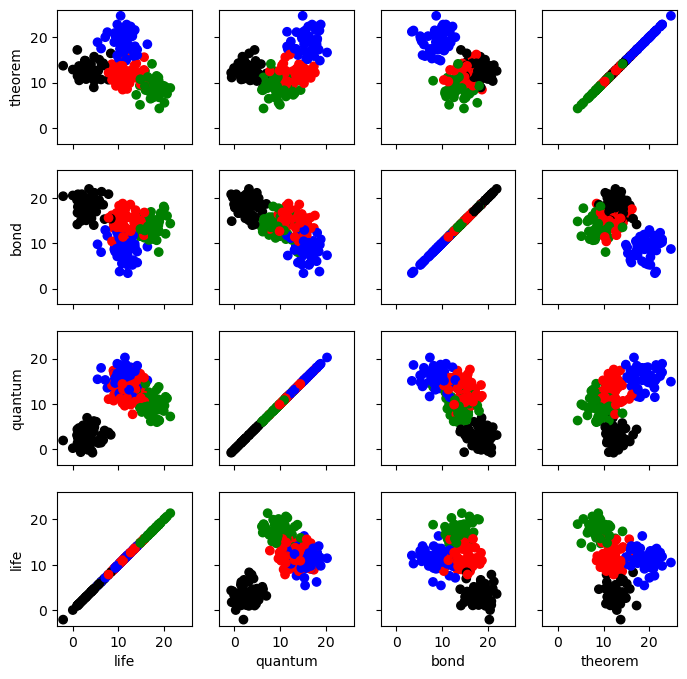

In [8]:
# create 16 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(8,8))

# get the 0th column of the matrix (i.e. counts of the word "life")
life = X[:,0]
# get the 1st column of the matrix (i.e. counts of the word "quantum")
quantum = X[:,1]
# get the 2st column of the matrix (i.e. counts of the word "bond")
bond = X[:,2]
# get the 3st column of the matrix (i.e. counts of the word "theorem")
theorem = X[:,3]

# One dictionary for all of them
data={0: life, 1: quantum, 2: bond, 3: theorem}

# labels
words=['life', 'quantum', 'bond', 'theorem']
                         
# create a "scatterplot" of the data in X
# the first argument to plt.scatter is a list of x-axis values
# the second argument to plt.scatter is a list of y-axis values
# c=labels specifies we want to use the list of labels to color each point
# cmap=plt.cm.RdYlBu specifies we want to use the Red Yellow Blue colors in the chart

colors=np.array(['r', 'g', 'b', 'k'])
colors=colors[labels]

for i in range(4):
    for j in range(4):
        axes[i,j].scatter(data[3-j], data[i], c=colors) #,cmap=plt.cm.RdYlBu)
    axes[3,i].set_xlabel(words[i])
    axes[i,0].set_ylabel(words[3-i])

The plot above shows each of our 200 labelled books, positioned according to the counts of the words "life", "quantum", "bond" and "theorem" in the book, and colored by the book's genre label. Biology books are green; Physics books are red, Chemistry are black and Math books are blue. As we can see, the 4 genres appear distinct here, which means we can expect that some classification is possible.

The important thing about the data above is that we know the genre label of each book. *In classification tasks, we leverage labelled data in order to make informed predictions about unlabelled data*. One of the simplest ways to make this kind of prediction is to use a K-Nearest Neighbor classifier.

### K-Nearest Neighbors Classifiers

With a [**K-Nearest Neighbors Classifier**](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), we start with a labelled dataset (e.g. 200 books with genre labels). We then add new, unlabelled observations to the dataset. For each, we consult the K labelled observations to which the unlabelled observation is closest, where K is an odd integer we use for all classifications. We then find the most common label among those K observations (the "K nearest neighbors") and give a new observation that label.

The following diagram shows this scenario. Our new observation (represented by the question mark) has some points near it that are labelled with a triangle or star. Suppose we have chosen to use 3 for our value of K. In that case, we consult the 3 nearest labelled points near the question mark. Those 3 nearest neighbors have labels: star, triangle, triangle. Using a majority vote, we give the question mark a triangle label.

<img src='./fig/knn.gif'>

Examining the plot above, we can see that if K were set to 1, we would classify the question mark as a star, but if K is 3 or 5, we would classify the question mark as a triangle. That is to say, K is an important parameter in a K Nearest Neighbors classifier.

To show how to execute this classification in Python, let's show how we can use our labeled book data to classify an unlabelled book:

In [9]:
from sklearn.neighbors import KNeighborsClassifier

areas=np.array(['Chemistry', 'Mathematics', 'Physics', 'Biology'])

count_life=10.0
count_quantum=10.0
count_bond=10.0
count_theorem=20.0

# create a KNN classifier using 3 as the value of K
clf = KNeighborsClassifier(5)

# "train" the classifier by showing it our labelled data
clf.fit(X, labels)

# predict the genre label of a new, unlabelled book
value=clf.predict(np.array([[count_life, count_quantum, count_bond, count_theorem]]))

areas[value][0]

'Mathematics'

For each observation we pass as input to <code>clf.predict()</code>, the function returns one label (from 0 to 3). In the snippet above, we pass in only a single observation, so we get only a single label back. The example observation above gets a label 1, which means the model thought this particular book is about Mathematics. Just like that, we've trained a machine learning classifier and classified some new data!

The classification example above shows how we can classify just a single point in the features space, but suppose we want to analyze the way a classifier would classify each possible point in that space or a subspace. To do so, we can transform our space into a grid of units, then classify each point in that grid. Analyzing a space in this way is known as identifying a classifier's [**decision boundary**](https://en.wikipedia.org/wiki/Decision_boundary), because this analysis shows one of the boundaries between different classification outcomes in the feature space. This kind of analysis is very helpful in training machine learning models because studying a classifier's decision boundary can help one see how to improve the classifier.

Let's plot our classifier's decision boundary below:

In [10]:
print(labels[:10])
chem_labels=(labels!=0).astype(int)
print(len(chem_labels))
chem_labels[:10]

[3 3 0 2 3 0 1 3 0 2]
200


array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# import some custom helper code
import helpers

In [12]:
# create and train a KNN model
clf = KNeighborsClassifier(5)
clf.fit(X[:,:2], chem_labels)

KNeighborsClassifier()

Text(0, 0.5, 'occurrences of word quantum')

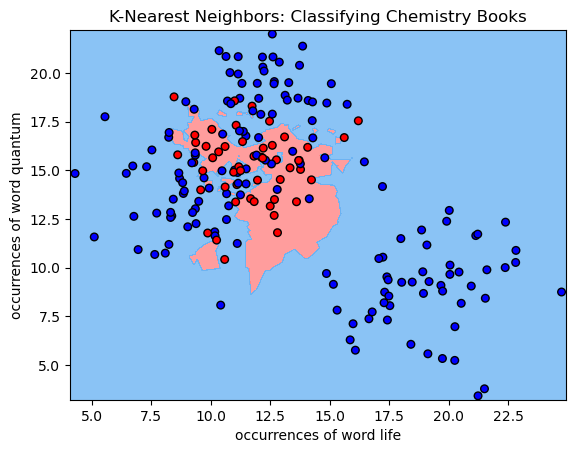

In [13]:
# use a helper function to plot the trained classifier's decision boundary
helpers.plot_decision_boundary(clf, X, chem_labels)

# add a title and axis labels to the chart
plt.title('K-Nearest Neighbors: Classifying Chemistry Books')
plt.xlabel('occurrences of word life')
plt.ylabel('occurrences of word quantum')

For each pixel in the plot above, we retrieve the 5 closest points with known labels. We then use a majority vote of those labels to assign the label of the pixel. This is exactly analogous to predicting a label for an unlabelled point&mdash;in both cases, we take a majority vote of the 5 closest points with known labels. Working in this way, we can use labelled data to classify unlabelled data. That's all there is to K-Nearest Neighbors classification!

It's worth noting that K-Nearest Neighbors is only one of many popular classification algorithms. From a high-level point of view, each classification algorithm works in a similar way&mdash;each requires a certain number of observations with known labels, and each uses those labeled observations to classify unlabelled observations. However, different classification algorithms use different logic to assign unlabelled observations to groups, which means different classification algorithms have very different decision boundaries. In the chart below [[source](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)], each row plots the decision boundaries several classifiers give the same dataset. Notice how some classifiers work better with certain data shapes:

<img src='./fig/scikit_decision_boundaries.png'>

For an intuitive introduction to many of these classifiers, including Support Vector Machines, Decision Trees, Neural Networks, and Naive Bayes classifiers, see the simple introduction by Luis Serrano's [introduction to machine learning video](https://www.youtube.com/watch?v=IpGxLWOIZy4) discussed in the Going Further section below.

### Naive Bayes Classification

This is maybe one of the most popular methods used for classification as it is one of the most simplest and fastest method. As before, we have a series of features $\{x_i\}$ and a class $\{c_j\}$, where $i=1,\cdots,n$, $n$ being the total number of features and $j=1,\cdots , m$, $m$ is the total number of classes. The most important assumption of the Naive Bayes method is to assume that the features are uncorrelated and it is based on the so called Bayes theory, which provides a method to calculate the posterior probability $P(c_i|x_1,x_2,\cdots,x_n)$ from $P(c_j)$, $P(x_1,x_2,\cdots,x_n)$ and 

$$P(x_1,x_2,\cdots,x_n|c_j)=P(x_1|c_j)P(x_2|c_j)P(x_3|c_j)\cdots P(x_n|c_j)$$.

This is given by

\begin{equation}
P(c_i|x_1,x_2,\cdots,x_n) = \frac{ P(x_1|c_j)P(x_2|c_j)P(x_3|c_j)\cdots P(x_n|c_j) P(c_j)}{P(x_1,x_2,\cdots,x_n)}
\end{equation}


where $P(t|x)$ is the posterior probability for target $t$ given the attributes $x$, $P(x|t)$ s the likelihood which is the probability of predictor given target,  $P(t)$ is the prior probability that the target is in a given class and $P(x)$ is the prior probability of predictor.

As this theorem could a bit cumbersome to understand, it is easier if we take an example

Let us consider below a training data set of the exercise programming of a person depending on his mude, which provide if the person will do exercise or not. Now, we need to classify whether the person will exercise or not based on his/her mude. Let’s follow the below steps to perform it.

In [14]:
import pandas as pd
d=[['Upset','Yes'],['Upset','Yes'],['Happy','No'],['Sad','Yes'],['Sad','Yes'],['Sad','No'],['Upset','Yes'],['Upset','Yes'],['Happy','No'],['Upset','No'],['Happy','No'],['Sad','Yes'],['Upset','Yes'],['Sad','Yes'],['Happy','Yes']]
data=pd.DataFrame(d,columns=['Mude','Exercise'])
print(data)

     Mude Exercise
0   Upset      Yes
1   Upset      Yes
2   Happy       No
3     Sad      Yes
4     Sad      Yes
5     Sad       No
6   Upset      Yes
7   Upset      Yes
8   Happy       No
9   Upset       No
10  Happy       No
11    Sad      Yes
12  Upset      Yes
13    Sad      Yes
14  Happy      Yes


Now let us calculate the frequency table

In [15]:
pd.crosstab(data['Mude'], [data['Exercise']])

Exercise,No,Yes
Mude,,
Happy,3,1
Sad,1,4
Upset,1,5


Now let us calculate the probability per each state of possible Mude

In [16]:
rating_probs = data.groupby('Mude').size().div(len(data))
print(rating_probs)

Mude
Happy    0.266667
Sad      0.333333
Upset    0.400000
dtype: float64


Now let us calculate the conditional probabilities

In [17]:
data.groupby(['Mude', 'Exercise']).size().div(len(data)).div(rating_probs, axis=0, level='Mude')

Mude   Exercise
Happy  No          0.750000
       Yes         0.250000
Sad    No          0.200000
       Yes         0.800000
Upset  No          0.166667
       Yes         0.833333
dtype: float64

Now that we have a way to estimate the probability of a given data point falling in a certain class, $P(c_i|x_1,x_2,\cdots,x_n)$, we need to be able to use this to produce classifications. Naive Bayes handles this in as simple as possible; simply pick the c_i that has the largest probability given the data point’s features.
If the features are continuous, what we usually do is to model the probability distribution of $P(x_i,c_j)$. Usually a Gaussian distribution is used.

Some of the real uses of this methodology as in spam email classification and news articles classification.

# Anomaly Detection

[**Anomaly detection**](https://en.wikipedia.org/wiki/Anomaly_detection) 
is the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data, the so-called outliers. They can be due to data spurious or they can be real as in
bank fraud, medical problems, structural defects, malfunctioning equipment, structural phase transitions, etc. While detecting anomalies in a single dimension can be quite simple, finding anomalies in high-dimensional datasets is a difficult problem.

One technique for classifying anomalies in high-dimensional datasets is an [**Isolation Forest**](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf). An Isolation Forest identifies outliers in a dataset by randomly dividing a space until each point is isolated from the other. After repeating this procedure several times, the Isolation Forest identifies points that are quickly isolated from other points as outliers. Isolation Forest explicitly identifies anomalies instead of profiling normal data points. An anomalous point could be separated in a few steps while normal points which are closer could take significantly more steps to be segregated.

The illustration below attempts to illustrate the method by which these outliers are quickly identified. Isolated points are colored green and labeled with the iteration on which they were isolated. If you repeat the procedure several times, you'll see the outlier is consistently isolated quickly, which allows the Isolation Forest to identify that point as an outlier.

In [18]:
from IPython.display import IFrame

IFrame(src='https://s3.amazonaws.com/duhaime/blog/visualizations/isolation-forests.html', width=700, height=640)

If we run the simulation above a number of times, we should see the "outlier" point is consistently isolated quickly, while it usually takes more iterations to isolate the other points. This is the chief intuition behind the Isolation Forests outlier classification strategy&mdash;outliers are isolated quickly because they are farther from other points in the dataset.

Let's build a sample dataset and use Isolation Forests to classify the outliers in that dataset. 

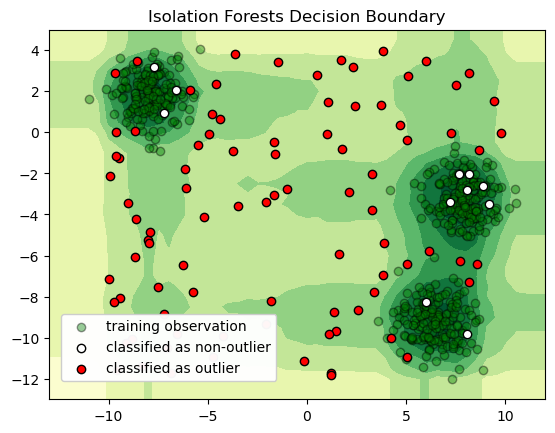

In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# seed a random number generator for consistent random values
rng = np.random.RandomState(1)

# generate 100 "training" data observations
n_training = 500
X, _ = make_blobs(random_state=6, n_samples=n_training)

# create the IsolationForest classifier
clf = IsolationForest(max_samples=500, random_state=1, n_jobs=-1)

# train the classifier on the training data
clf.fit(X)

# generate 100 new observations
new_vals = rng.uniform(low=(-10, -12), high=(10, 4), size=(100, 2))

# get classification results for the new observations; `result` contains
# one observation for each value in `new_vals`: a 1 means the point was
# in the training distribution, -1 means the point is an outlier
result = clf.predict(new_vals)

# plot the classification results
helpers.plot_iforest_decision_boundary(clf, X, new_vals, result)

In just a few lines of code, we can create, train, and deploy a machine learning model for detecting outliers in high-dimensional data!

# Dimensionality Reduction

In our example above, we used 4 labels (the book type) and 4 words existing in the text (life, quantum, bond, and theorem) to classify new books from the number of occurrences of those words on new books. While each observation in the dataset above has only four components, it is quite challenging to visualize. In more real-world scenarios, the number of features can be tens, hundreds or even thousands of features. We can count more words, we can actually use all the words in those books. The resulting number of features will be on the order of thousands. However, having that extra data does not necessarily mean that the classification will be better, and it can surely make things worst. There are words that are not specific to any discipline so counting its number will be irrelevant. There are other words, like atom that are probably shared in equal numbers by books on Chemistry and Physics so those words will not help either.

"High-dimensional" datasets can be quite hard to work with and also very hard to understand. High dimensional datasets also pose specific challenges to many machine learning models (see **[The Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)**). To work around these challenges, it's often helpful to reduce the number of dimensions required to express a given dataset. This proposed reduction is trying to solve two problems. The dimensionality reduction itself and the focus on more relevant features that maximize the probability of successful 
classifications.

One popular way to reduce the dimensionality of a dataset is to use a technique called [**Principal Component Analysis**](https://en.wikipedia.org/wiki/Principal_component_analysis). PCA tries to find a lower dimensional representation of a dataset by projecting that dataset down into a smaller dimensional space in a way that minimizes loss of information.

To get an intuition about PCA, suppose you have points in two dimensions, and you wish to reduce the dimensionality of your dataset to a single dimension. To do so, you could find the center of the points then create a line $L$ with a random orientation that passes through that center. One can then project each point onto $L$ such that an imaginary line between the point and $L$ form a right angle. Within this "projection", each 2D point can be represented with just its position along the 1D $L$, effectively giving us a 1D representation of the point's position in its original space. Furthermore, we can use the difference between the largest and smallest values of points projected onto $L$ as a measure of the amount of "variance" or "spread" within the data captured in $L$&mdash;the greater this spread, the greater the amount of "signal" from the original dataset is represented in the projection. Therefore, PCA tries to maximize the sum of the square distances from the projected points to the "centroid" of the data or the center of the line. Another feature obtained from the analysis is the relative importance of the different variables. From the slope of the line, we can correlate the relevance and importance of the variables. In the example below, if the line has a slope of 0.1, it means that the first variable (along the X-axis) is more sensitive to the measurements than the second variable.

If one were to slowly rotate $L$ and continue measuring the delta between the greatest and smallest values on $L$ at each orientation, one could find the orientation of the projection line that minimizes information loss. (This line of minimal information loss is shown in pink below.) Once that line is discovered, we can actually project all of our points onto that lower-dimensional embedding (see the red points below when the black line is colinear with the pink line):

<img src='./fig/pca.gif'>


For a beginner-friendly deep dive into the mechanics behind this form of dimension reduction, check out Josh Starmer's [step-by-step guide to PCA](https://www.youtube.com/watch?v=FgakZw6K1QQ).

What makes this kind of dimension reduction useful for research? There are two primary uses for dimension reduction: data exploration and data analysis.

# Clustering

Clustering is a powerful unsupervised machine learning technique, and one that often requires some kind of distance metric. A cluster refers to a collection of data points aggregated together because of certain similarities. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

There are a variety of methods for clustering vectors, including [density-based clustering](https://en.wikipedia.org/wiki/DBSCAN), [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering), and [centroid clustering](https://en.wikipedia.org/wiki/Cluster_analysis). One of the most intuitive and most commonly used centroid-based methods is [**K-Means Clustering**](https://en.wikipedia.org/wiki/K-means_clustering). Given a collection of points in space, K-Means selects *K* "centroid" points which are equidistant from all points and the other centroids.
The target number k is the number of centroids needed to classify the dataset (this value can be optimized but following the reduction in variation as K increases). A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters by reducing the in-cluster sum of squares. In practice, we select the positions of the centroids
randomly (colored green below), then each data point is assigned to the closest centroid. 
Using these preliminary groupings, the next step is to find the geometric center of each group (the cluster mean). These group centers become the new centroids, and again each point is assigned to the centroid to which it's closest. This process continues until centroid movement falls below some minimal movement threshold, after which the clustering is complete. An assessment over the quality is done by calculating the cluster spread. By repeating the process with different initial conditions, we can get a simple approach to identify the lowest spread of all. Here’s a nice visual description of K-Means:

<img src='./fig/kmeans.gif'>

Let's get a taste of K-means clustering by using the technique to cluster some high-dimensional vectors. For this demo, we can use Stanford University's [**GloVe vectors**](https://nlp.stanford.edu/projects/glove/), which provide a vector representation of each word in a corpus. The basic training is performed on aggregated global word-word co-occurrence statistics from a corpus.
In what follows below, we'll read in the GloVe file, split out the first `n` words and their corresponding 50 dimensional vectors, then examine the first word and its corresponding vector.

In [20]:
from zipfile import ZipFile
from collections import defaultdict
from urllib.request import urlretrieve
import numpy as np
import json, os, codecs

# download the vector files we'll use
if not os.path.exists('./data/glove.6B.zip'):
  urlretrieve('http://nlp.stanford.edu/data/glove.6B.zip', './data/glove.6B.zip')
# unzip the downloaded zip archive
zf = ZipFile('./data/glove.6B.zip')

FileNotFoundError: [Errno 2] No such file or directory: './data/glove.6B.zip'

In [ ]:
zf.filelist

In [ ]:
data = zf.read("glove.6B.50d.txt").decode("utf-8") 

#zf.extract("glove.6B.50d.txt")
#data = codecs.open('glove.6B.50d.txt', 'r', 'utf8')
#os.remove('glove.6B.50d.txt')

In [ ]:
# get the first n words and their vectors
vectors = []
words = []
n = 50000
for row_idx, row in enumerate(data.split('\n')):
  if row_idx > n: break
  split_row = row.split()
  word, vector = ' '.join(split_row[:-50]), [float(i) for i in split_row[-50:]]
  words += [word]
  vectors += [vector]
    
# check out a sample word and its vector
print(words[1700], vectors[1700], '\n')

As we can see above, <code>words</code> is just a list of words. For each of those words, <code>vectors</code> contains a corresponding 50-dimensional vector (or list of 50 numbers). Those vectors indicate the semantic meaning of a word. In other words, if the English language were a 50-dimensional vector space, each word in <code>words</code> would be positioned in that space by virtue of its corresponding vector.

Words that have similar meanings should appear near one another within this vector space. To test this hypothesis, let's use K-Means clustering to identify 20 clusters of words within the 50-dimensional vector space discussed above. After building a K-Means model, we'll create a map named <code>groups</code> whose keys will be cluster ids (0-19) and whose values will be lists of words that belong to a given cluster number. After creating that variable, we'll print the first 10 words from each cluster:

In [ ]:
from sklearn.cluster import KMeans

# cluster the word vectors
kmeans = KMeans(n_clusters=20, random_state=0).fit(np.array(vectors))

# `kmeans.labels_` is an array whos `i-th` member identifies the group to which
# the `i-th` word in `words` is assigned
groups = defaultdict(list)
for idx, i in enumerate(kmeans.labels_):
  groups[i] += [words[idx]]

# print the top 10 words contained in each group
for i in groups:
  print(groups[i][:10])

The output above shows the top 10 words in each of the 20 clusters identified by K-Means. Examining each of these word lists, we can see each has a certain topical coherence. For example, some of the word clusters contain financial words, while others contain medical words. These clusters work out nicely because K-Means is able to cluster nearby word vectors in our vector space!

# Loss Functions in Machine Learning

In reality, machines learn by means of a loss function. This function evaluates how the created model fits the given data. As we optimize our procedure, the loss function is able to reduce the prediction error. Before, we go specifically into some models of Machine Learning, let me give you some details about the used loss functions.

1) **Mean Square Error (MSE)**. This function measures the average of squared difference between predictions and actual observations as

\begin{equation}
\text{MSE} = \frac{\sum^N (y_i - \hat{y}_i)^2}{N} 
\end{equation}

where $N$ is the total available data, $\hat{y}$ is the predicted outcome and $y$ is the actual result. 

2) **Mean Absolute Error (MAE)**.  This function measures the average of sum of absolute differences between predictions and actual observations. MAE is more robust to outliers since it does not make use of the square function, which penalize these differences.

\begin{equation}
\text{MSE} = \frac{\sum^N |y_i - \hat{y}_i|}{N} 
\end{equation}

3) **Hinge Loss/Multi class Loss**. It is useful for classification problems and it is based on the assumption that the score of the correct category should be greater than the sum of the scores of all incorrect categories by some safety margin.

\begin{equation}
\text{SVMLoss}_i = \sum_{j \neq y_i} \max(0, s_j - s_{y_i} +1) 
\end{equation}

where $s_j$ is a scoring of a particular data for the $j$ class, $SVMLoss_i$ is the loss for the $i-$data point, $y_i$ is the true class and the sum is performed over all possible classes. 

4) **Cross Entropy Loss/Negative Log Likelihood**. This method uses the idea of information or entropy as the main function and increases as the predicted probability diverges from the actual label.

\begin{equation}
\text{CrossEntropyLoss} = - \left( y_i \log \hat{y_i} + (1- y_i) \log ( 1- \hat{y_i} ) \right)
\end{equation}





---

# Acknowledgments

This notebook is based on a variety of sources, usually other notebooks, the material was adapted to the topics covered during lessons. In some cases, the original notebooks were created for Python 2.x or older versions of Scikit-learn or Tensorflow and they have to be adapted to at least Python 3.7. 
 
We acknowledge the support of the National Science Foundation and the US Department of Energy under projects: DMREF-NSF 1434897, NSF OAC-1740111 and DOE DE-SC0016176 is recognized.

<div style="clear: both; display: table;">
<div style="border: none; float: left; width: 40%; padding: 10px">
<img src="fig/NSF.jpg" alt="National Science Foundation" style="width:50%" align="left">
    </div>
    <div style="border: none; float: right; width: 40%; padding: 10px">
<img src="fig/DOE.jpg" alt="National Science Foundation" style="width:50%" align="right">
</div>

---

# References

The snippets above are meant only to give a brief introduction to some of the most popular techniques in machine learning so you can decide whether this kind of analysis might be useful in your research. If it seems like machine learning will be important in your work, you may want to check out some of the resources listed below (arranged roughly from least to most technical):

This list is by no means an exhaustive list of books and resources. I am listing the books from which I took inspiration. Also, I am listing materials where I found better ways to present topics. Often I am amazed by how people can create approachable materials for seemingly dry subjects.

The order of the books goes from divulgation and practical to the more rigorous and mathematical. Slides, blogs, and videos are those I have found over the internet or suggested by others.

### Selection of Books on Machine Learning

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Hands-On Machine Learning  with Scikit-Learn and TensorFlow" 
       src="./fig/books/Hands-On Machine Learning  with Scikit-Learn and TensorFlow.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Hands-On Machine Learning  with Scikit-Learn and TensorFlow (First Edition [There is a second edition])<br>
      Auréleien Géron<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Python Machine Learning - Raschka" 
       src="./fig/books/Python Machine Learning - Raschka.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Machine Learning, a Probabilistic Perspective<br>
      Sebastian Raschka and Vahid Mirjalili<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Foundations of Machine Learning - Mohri" 
       src="./fig/books/Foundations of Machine Learning - Mohri.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Foundations of Machine Learning (Second Edition)<br>
      Mehryar Mohri, Afshin Rostamizadeh and Ameet Talwalkar<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Machine Learning - Alpaydin" 
       src="./fig/books/Introduction to Machine Learning - Alpaydin.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Machine Learning (Fourth Edition)<br>
      Ethem Alpaydin<br>
      2020<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Machine Learning, a Probabilistic Perspective - Murphy" 
       src="./fig/books/Machine Learning, a Probabilistic Perspective - Murphy.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Machine Learning, a Probabilistic Perspective<br>
      Kevin P. Murphy<br>
      2012<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Elements of Statistical Learning - Hastie" 
       src="./fig/books/Elements of Statistical Learning - Hastie.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      <a href="https://hastie.su.domains/Papers/ESLII.pdf">Elements of Statistical Learning</a><br>
      Trevor Hastie, Robert Tibshirani, and Jerome Friedman<br>
      2008<br>
  </div>
</div>


### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelien Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml) and
   [Second Edition](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 

 * [A Friendly Introduction to Machine Learning](https://www.youtube.com/watch?v=IpGxLWOIZy4)

In this 30-minute video, Luis Serrano (head of machine learning at Udacity) offers intuitive, user-friendly introductions to the mechanics that drive several machine learning models, including Naive Bayes, Decision Tree, Logistic Regression, Neural Network, and Support Vector Machine classifiers. This video is a great place to start for those looking for quick intuitions about the ways these algorithms work.

 * [Hands-On Machine Learning with Scikit-Learn and TensorFlow (OREILLY)](http://shop.oreilly.com/product/0636920052289.do)

This OREILLY book offers a great high-level introduction to machine learning with Python. Aurélien Géron guides readers through ways one can use scikit-learn and other popular libraries to build machine learning models in Python. This is a great choice for those who just want to get work done, without necessarily unlocking the insights that would allow one to build models from scratch.

 * [Machine Learning Cheatsheets](https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463)

This collection of "cheat sheets" gives concise overviews of the API's and models behind many of the most prominent packages and concepts in machine learning and its allied fields, including different neural network architectures, numerical optimization techniques, algorithms appropriate for different tasks, scikit-learn, pandas, scikit-learn, scipy, ggpot2, dplyr and tidyr, big O notation, and several other topics. Recently identified as the "most popular" article on machine learning in Medium.

 * [Mining of Massive Datasets](http://www.mmds.org/)

This Stanford University course and digital publication offer introductions to a wide array of subtopics in machine learning. The authors focus on helping readers gain an intuitive understanding of how machine learning models work. One of the most lucid and concise treatments of machine learning available on the web.

 * [Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)

This Stanford University course offers a spectacular introduction to Convolutional Neural Networks, the cornerstone of modern machine learning in the domain of computer vision. If your work involves images or video materials, and you'd like to apply machine learning techniques to your data, this course will help you get up and running with state-of-the-art techniques in convnets.

 * [Machine Learning (Andrew Ng, Coursera)](https://www.coursera.org/learn/machine-learning)

Andrew Ng's Coursera course on machine learning will help you master many of the fundamentals involved in modern machine learning. Professor Ng will guide you through a great deal of the math involved in contemporary machine learning, starting with simple linear classifiers and building up into complex neural network architectures. This class is ideal for those who like to understand the math behind the models they use.
 
 ---

# Back of the Book

In [ ]:
plt.figure(figsize=(3,3))
n = chapter_number
maxt=(2*(n-1)+3)*np.pi/2
t = np.linspace(np.pi/2, maxt, 1000)
tt= 1.0/(t+0.01)
x = (maxt-t)*np.cos(t)**3
y = t*np.sqrt(np.abs(np.cos(t))) + np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [ ]:
end = time.time()
print(f'Chapter {chapter_number} run in {int(end - start):d} seconds')